## Lesson 6. Handle missing spatial data

In [15]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import earthpy as et
import matplotlib.pyplot as plt

In [2]:
data_path = et.data.get_data('spatial-vector-lidar')

In [3]:
sjer_roads = gpd.read_file(os.path.join(data_path,
                                        'california',
                                        'madera-county-roads',
                                        'tl_2013_06039_roads.shp'))
type(sjer_roads)

geopandas.geodataframe.GeoDataFrame

#### Explore Data Values

Find the number of missing values per column in a dataframe

In [4]:
sjer_roads.isnull().sum()

LINEARID       0
FULLNAME    5149
RTTYP       5149
MTFCC          0
geometry       0
dtype: int64

In [5]:
sjer_roads.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,110454239066,N 14th St,M,S1400,"LINESTRING (-120.27227 37.11615, -120.27244 37..."
1,110454239052,N 11th St,M,S1400,"LINESTRING (-120.26788 37.11667, -120.26807 37..."
2,110454239056,N 12th St,M,S1400,"LINESTRING (-120.27053 37.11749, -120.27045 37..."
3,110454239047,N 10th St,M,S1400,"LINESTRING (-120.26703 37.11735, -120.26721 37..."
4,110454243091,N Westberry Blvd,M,S1400,"LINESTRING (-120.10122 36.96524, -120.10123 36..."


<code>.describe()</code> doesn't seem to work in geopandas?

In [6]:
sjer_roads.describe()

AttributeError: 'GeometryArray' object has no attribute 'value_counts'

Double check unique values in the road type column

In [7]:
print(sjer_roads['RTTYP'].unique())

['M' None 'S' 'C']


Replace <code>None</code> values with 'Unknown'

In [8]:
sjer_roads['RTTYP'] = sjer_roads['RTTYP'].fillna('Unknown')
print(sjer_roads['RTTYP'].unique())

['M' 'Unknown' 'S' 'C']


#### Optional Challenge: Import and Plot Roads Shapefile

In [10]:
data_path = et.data.get_data('spatial-vector-lidar')

In [13]:
mc_roads = gpd.read_file(os.path.join(data_path,
                                      'california',
                                      'madera-county-roads',
                                      'tl_2013_06039_roads.shp'))
sjer_centroids = gpd.read_file(os.path.join(data_path,
                                            'california',
                                            'neon-sjer-site',
                                            'vector_data',
                                            'SJER_plot_centroids.shp'))
sjer_crops = gpd.read_file(os.path.join(data_path,
                                        'california',
                                        'neon-sjer-site',
                                        'vector_data',
                                        'SJER_crop.shp'))

In [14]:
mc_roads.crs
sjer_centroids.crs
sjer_crops.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 120°W to 114°W - by country
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 120°W to 114°W - by country
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

(-120.6051993, -118.9561167, 36.725532099999995, 37.7326239)

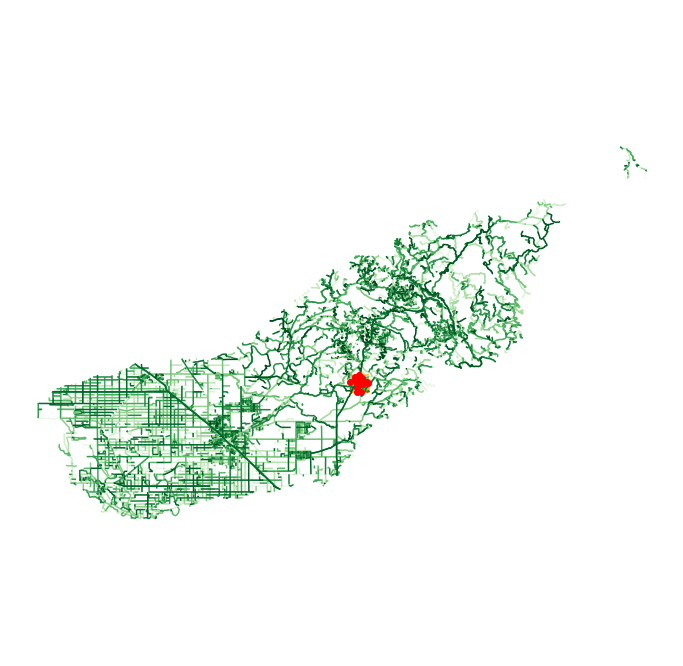

In [21]:
fig, ax = plt.subplots(figsize=(12,12))

mc_roads.plot(ax=ax,
              cmap='Greens',
              zorder=3)
sjer_crops.to_crs(mc_roads.crs).plot(ax=ax,
                                     color='orange',
                                     zorder=2)
sjer_centroids.to_crs(mc_roads.crs).plot(ax=ax,
                                         color='red',
                                         zorder=5)
plt.axis('equal')
ax.set_axis_off()
plt.show()